#**Importing Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

#**Loading DataSet**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/talking_data.csv")
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


#**EDA**

In [4]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [5]:
df = data.copy()

In [6]:
df.drop('attributed_time', axis = 'columns', inplace = True)

In [7]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

In [8]:
df.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [9]:
print(data['ip'].unique().sum())
print(data['app'].unique().sum())
print(data['device'].unique().sum())
print(data['os'].unique().sum())
print(data['channel'].unique().sum())
print(data['click_time'].unique().sum())
print(data['is_attributed'].unique().sum())


4112519453
20306
61467
12565
46577
2017-11-07 09:30:382017-11-07 13:40:272017-11-07 18:05:242017-11-07 04:58:082017-11-09 09:00:092017-11-09 01:22:132017-11-09 01:17:582017-11-07 10:01:532017-11-08 09:35:172017-11-08 12:35:262017-11-08 08:14:372017-11-07 05:03:142017-11-09 10:24:232017-11-08 14:46:162017-11-07 00:54:092017-11-08 23:17:452017-11-09 07:33:412017-11-09 03:44:352017-11-06 23:14:082017-11-06 20:07:002017-11-09 09:55:222017-11-08 17:01:582017-11-08 02:05:372017-11-07 10:30:002017-11-07 01:35:312017-11-07 03:58:582017-11-07 16:19:052017-11-07 17:22:522017-11-07 06:39:042017-11-07 10:11:502017-11-09 03:14:432017-11-07 14:00:502017-11-09 12:39:112017-11-07 09:37:212017-11-07 07:01:202017-11-06 23:45:322017-11-06 16:24:242017-11-07 13:28:542017-11-07 03:20:592017-11-08 11:09:482017-11-07 11:11:532017-11-09 15:26:372017-11-07 23:11:392017-11-09 04:23:012017-11-09 10:04:272017-11-07 00:49:132017-11-08 00:56:332017-11-08 02:14:222017-11-08 14:40:362017-11-08 17:33:472017-11-09 15:1

#**Using an appropriate technique to get rid of all the apps that are very rare (say which comprise of lessthan 20% clicks) and plot the rest..**

In [10]:
app_use = df.groupby('app').is_attributed.agg(['mean', 'count'])
app_use

,mean,count
app,,
1,0.000000,3135
2,0.000000,11737
3,0.000219,18279
4,0.000000,58
5,0.074468,188
...,...,...
486,0.000000,1
536,0.000000,1
538,0.000000,1


In [11]:
app_of = df.groupby('app').size().reset_index(name = 'count')
app_of = app_of[app_of['count']>app_of['count'].quantile(0.80)]
app_of = app_of.merge(df, on = 'app', how = 'inner')
app_of.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


#**Ploting App**

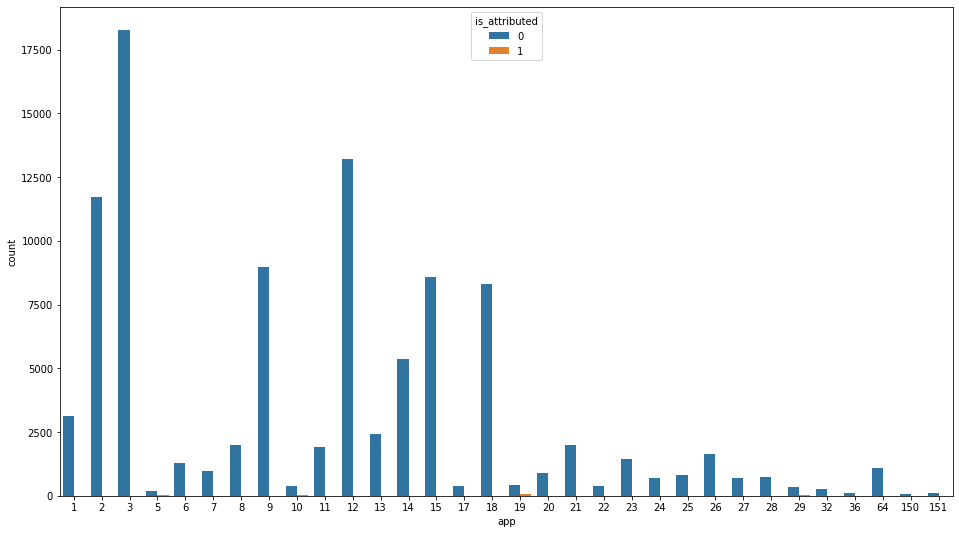

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(x= 'app',hue= "is_attributed", data = app_of)

#**Adding New Column with:**

1.   Week
2.   Year 
3.   Month
4.   Hour









In [13]:
df['datetime'] = pd.to_datetime(df['click_time'])
df['day_of_week'] = df['datetime'].dt.day_of_week
df['day_of_year'] = df['datetime'].dt.day_of_year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

df.head()

,ip,app,device,os,channel,click_time,is_attributed,datetime,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017-11-07 09:30:38,1,311,11,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017-11-07 13:40:27,1,311,11,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017-11-07 18:05:24,1,311,11,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017-11-07 04:58:08,1,311,11,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017-11-09 09:00:09,3,313,11,9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ip             100000 non-null  int64         
 1   app            100000 non-null  int64         
 2   device         100000 non-null  int64         
 3   os             100000 non-null  int64         
 4   channel        100000 non-null  int64         
 5   click_time     100000 non-null  object        
 6   is_attributed  100000 non-null  int64         
 7   datetime       100000 non-null  datetime64[ns]
 8   day_of_week    100000 non-null  int64         
 9   day_of_year    100000 non-null  int64         
 10  month          100000 non-null  int64         
 11  hour           100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


In [15]:
df.drop(['click_time','datetime'], axis = 'columns', inplace = True)

In [16]:
df.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9


#**Balancing Data**

In [17]:
x = df.drop(['is_attributed'],axis = 1)
y = df['is_attributed']

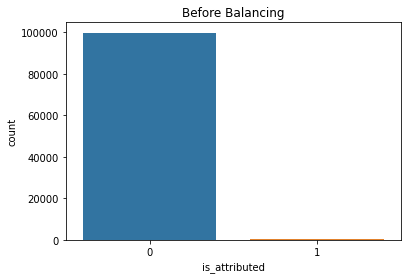

In [18]:
sns.countplot(y)
plt.title("Before Balancing")
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=2)
x1, y1 = sm.fit_resample(x,y.ravel())

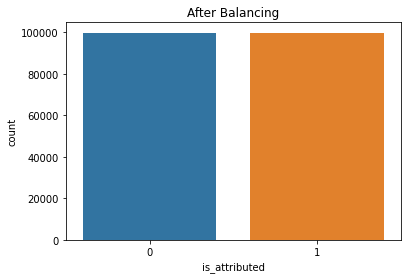

In [20]:
sns.countplot(y1)
plt.title("After Balancing")
plt.xlabel('is_attributed')
plt.show()

#**Spliting For Training And Testing**

In [21]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x1,y1 ,test_size = 0.20)


In [22]:
#Checking the ave download rates.
print(np.average(y_train))
print(np.average(y_test))

0.4999498859906287
0.5002004510147833


#**Applying XGBoost Classifier**

In [23]:
from xgboost import XGBClassifier


xg = XGBClassifier()
xg = xg.fit(x_train,y_train)
y_pred = xg.predict_proba(x_test)
mod_XG = xg.score(x_test,y_test)

y_pred[:10]

array([[0.9948586 , 0.0051414 ],
       [0.8953292 , 0.10467082],
       [0.93337077, 0.06662925],
       [0.00409943, 0.9959006 ],
       [0.9310163 , 0.06898366],
       [0.95763093, 0.04236905],
       [0.08127218, 0.9187278 ],
       [0.9711294 , 0.02887059],
       [0.04356098, 0.956439  ],
       [0.94952077, 0.05047924]], dtype=float32)

In [24]:
mod_XG

0.9574542721122525

#**AUR/ROC SCORE**

In [25]:
from sklearn.metrics import roc_auc_score

acc_score = roc_auc_score(y_test,y_pred[:,1])
print(round((acc_score)*100,2))

99.17


#**Feature Importance Score**

The feature importance score is [0.12504706 0.38943148 0.25759044 0.03452912 0.07952031 0.07957931
 0.         0.         0.03430221]



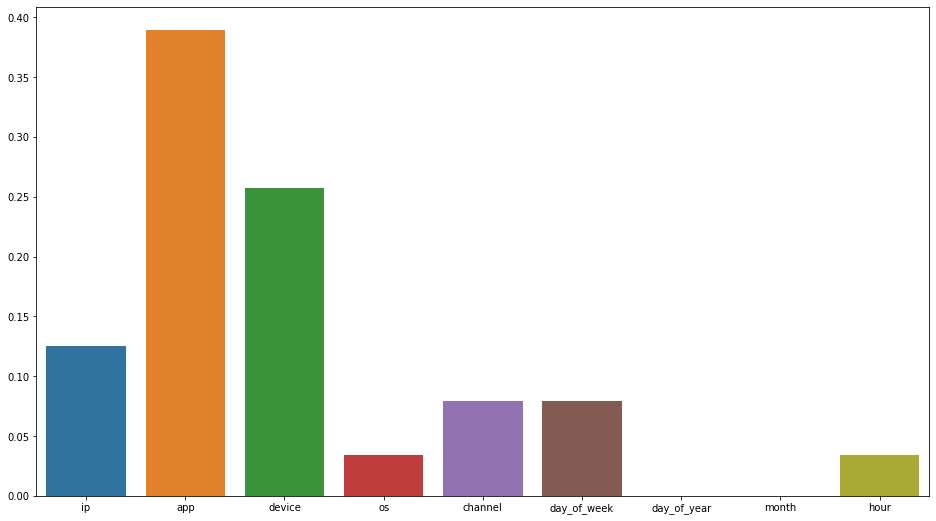

In [53]:
fi = xg.feature_importances_
print("The feature importance score is {}".format(fi))
print()
plt.figure(figsize=(16,9))
sns.barplot(x_test.columns,fi)


#**Extracting Top 5 Features by using RFE**

In [51]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
rfe = RFE(dt,n_features_to_select= 5)
rfe.fit(x_test, y_test)
x = rfe.support_

for feature in rfe.support_.nonzero():
  top_5 = x_test.columns[feature]
  print("The 5 imp features of our data set: ",top_5)

The 5 imp features of our data set:  Index(['ip', 'app', 'device', 'os', 'channel'], dtype='object')


#**Apply BaggingClassifier with base_estimator LogisticRegression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator= LogisticRegression(),n_estimators=10, bootstrap=True)

model = model.fit(x_train,y_train)

pred = model.predict_proba(x_test)
mod_BC = model.score(x_test,y_test)

In [28]:
mod_BC

0.8105737910298171

#**ROC AUC SCORE**

In [29]:
auc_roc = roc_auc_score(y_test,pred[:,1])
print(round((auc_roc)*100,2))

87.93


##**Comparision Model**

In [30]:
print("The XGBoost Classifier Ensemble model accuracy is {}".format(round((mod_XG)*100,2)))
print("The Bagging classifier model accuracy is {}".format(round((mod_BC)*100,2)))

The XGBoost Classifier Ensemble model accuracy is 95.75
The Bagging classifier model accuracy is 81.06
